# MLE - Exercise 2 - Comparative Experimentation
## Andreas Kocman (se19m024)

## Assignment
In this exercise, you shall experiment with a number of (simple) algorithms on several datasets. The aim is to get a feeling how well each of these algorithms works, and whether there are differences depending on the dataset.

The datasets are
* [Iris](https://archive.ics.uci.edu/ml/datasets/Iris), for Python, use http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)
* [Handwritten digits](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits), of which we only use the test set of 1797 instances; for Python, use http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)
* If you are a group of three (see below): [Breast Cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)); skip the ID field; in Python: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)

The classifiers you shall use are
* k-NN (with 3 different values for k)
* Naive Bayes
* Perceptron, and
* Decision Trees with 3 different parameter settings (e.g. some pre-pruning setting, different split criterion, ...)

For each dataset, you shall train and evaluate each classifier (with parameter variations), and then compute several evaluation metrics
* Effectiveness: Accuracy, and 1 more of your choice (precision, recall, F1, ...
* Efficiency: runtime for training & testing
* As evaluation set splitting technique, you shall use once the holdout method with 2/3 training and the rest for testing, and once cross validation with 5 folds.

You shall present these results in a tabular form, with one table for each dataset & splitting combination approach.

Iris/5-folds | Accuracy | Precision| Training time | Testing time
---|---|---|---|---|---
k-NN (3-NN) | .85 | .82 | 0.1 sec | 27 sec
Naive Bayes | .72 | .82 | 1 sec | 2 sec
Decision Tree | .92 | .76 | 5 sec | 2 sec
... | ... | ...| ... | ...

Then describe the results, and analyse e.g.:
* Which classifiers work best?
* Are there differences between the datasets?
* Are the differences in the efficiency measurements?
* How is the runtime changing with the different data sets?
* ...

You can solve this exercise alone, or in a group of two students. If you form a group, you need to extend your scope, by
* Adding a third dataset, namely breast cancer wisconsin
* For k-NN, using 5 different values for k instead of 3, and use both weighted and uniform distance (i.e. a total of 10 combinations); for Decision Trees, also add 3 more parameter variations
* Adding a third efficiency evaluation metric

## Deliverables
Your submission shall contain
* The textual report
* All code samples and
* All data sets (if not already included in your software package, e.g. Python)

## Sources used
* Scikit documentation
* https://simonhessner.de/why-are-precision-recall-and-f1-score-equal-when-using-micro-averaging-in-a-multi-class-problem/

In [1]:
#General Imports
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
import pandas as pd
import time

#Data reporting
from IPython.display import display

#Global variables
randomState=24  # change the state with the numeric parts of your matrikelnummer; if you are in a group, use the sume of the numeric parts
                # se19m024
averagingApproach = 'macro'
zero_divisionApproach = 0

#Overall report
ml_approaches = ['k-NN', 'bayes', 'perceptron', 'decision tree']
resultColumns = ['accuracy','precision','recall','time training', 'time testing']
overall_results_iris = pd.DataFrame(columns=resultColumns, index=ml_approaches)
overall_results_digits = pd.DataFrame(columns=resultColumns, index=ml_approaches)

## k-NN

### Iris

5 Fold Verification with N: 1
Accuracy: 0.96 (+/- 0.05)
5 Fold Verification with N: 2
Accuracy: 0.95 (+/- 0.07)
5 Fold Verification with N: 3
Accuracy: 0.96 (+/- 0.05)
5 Fold Verification with N: 4
Accuracy: 0.95 (+/- 0.07)
5 Fold Verification with N: 5
Accuracy: 0.96 (+/- 0.08)
5 Fold Verification with N: 6
Accuracy: 0.95 (+/- 0.09)
5 Fold Verification with N: 7
Accuracy: 0.95 (+/- 0.10)
5 Fold Verification with N: 8
Accuracy: 0.96 (+/- 0.10)
5 Fold Verification with N: 9
Accuracy: 0.97 (+/- 0.08)
5 Fold Verification with N: 10
Accuracy: 0.97 (+/- 0.11)
5 Fold Verification with N: 11
Accuracy: 0.98 (+/- 0.05)
5 Fold Verification with N: 12
Accuracy: 0.97 (+/- 0.08)
5 Fold Verification with N: 13
Accuracy: 0.97 (+/- 0.05)
5 Fold Verification with N: 14
Accuracy: 0.97 (+/- 0.10)
5 Fold Verification with N: 15
Accuracy: 0.97 (+/- 0.08)
5 Fold Verification with N: 16
Accuracy: 0.97 (+/- 0.10)
5 Fold Verification with N: 17
Accuracy: 0.97 (+/- 0.08)
5 Fold Verification with N: 18
Accuracy:

,accuracy,precision,recall,time training,time testing
1,0.9,0.90305,0.912698,0.000997305,0.00199461
2,0.92,0.925926,0.936508,0.000968218,0.00202489
3,0.94,0.941176,0.952381,0,0.00196934
4,0.92,0.925926,0.936508,0,0.00199461
5,0.96,0.958333,0.968254,0,0.00199389
6,0.92,0.925926,0.936508,0.000997305,0.00202751
7,0.96,0.958333,0.968254,0,0.00296092
8,0.92,0.925926,0.936508,0,0.00300026
9,0.98,0.977778,0.984127,0.000997543,0.00199366
10,0.92,0.925926,0.936508,0.000997782,0.0020225


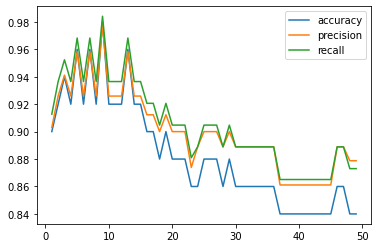

In [2]:
from sklearn import neighbors

# load the Iris dataset
dataSet = datasets.load_iris()

# Shuffle our input data
data, target = shuffle(dataSet.data, dataSet.target, random_state=randomState)

testvalues = range(1,50)

# Prepare dataframe for results
knn_results_iris = pd.DataFrame(columns=resultColumns, index=testvalues)

# Prepare a train/test set split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=(randomState+1))

# parameters for k-NN
n_neighbors = testvalues

for n in n_neighbors:
    # train the k-NN
    classifier = neighbors.KNeighborsClassifier(n)
    classifier.random_state = randomState
    start_time_train = time.time()
    classifier.fit(X_train, y_train)
    end_time_train = time.time()

    # predict the test set on our trained classifier
    start_time_test = time.time()
    y_test_predicted = classifier.predict(X_test)
    end_time_test = time.time()

    # Compute metrics
    acc = metrics.accuracy_score(y_test, y_test_predicted)
    recall=metrics.recall_score(y_test, y_test_predicted, average=averagingApproach, zero_division=zero_divisionApproach)
    precision = metrics.precision_score(y_test, y_test_predicted, average=averagingApproach, zero_division=zero_divisionApproach)

    scores = cross_val_score(classifier, data, target, cv=5)
    print("5 Fold Verification with N: " + str(n))
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

    result = pd.Series({
        'accuracy':acc,
        'precision':precision,
        'recall':recall,
        'time training':end_time_train-start_time_train,
        'time testing':end_time_test-start_time_test
    })
    knn_results_iris.loc[n] = result

print("Holdout Result for Iris Dataset and k-NN by Iterating over N values:")
display(knn_results_iris)
knn_results_iris[['accuracy','precision', 'recall']].plot.line()

#Store result with best accuracy in overall results dataframe
best_result = knn_results_iris[knn_results_iris['accuracy']==knn_results_iris['accuracy'].max()]
overall_results_iris.loc['k-NN']=best_result.loc[best_result.last_valid_index()]

##### Results:
The results indicate a best fit of a solution for n=9.

### Handwritten Numbers

N: 1
Accuracy: 0.99 (+/- 0.01)
N: 2
Accuracy: 0.99 (+/- 0.01)
N: 3
Accuracy: 0.99 (+/- 0.01)
N: 4
Accuracy: 0.99 (+/- 0.01)
N: 5
Accuracy: 0.99 (+/- 0.01)
N: 6
Accuracy: 0.99 (+/- 0.01)
N: 7
Accuracy: 0.99 (+/- 0.01)
N: 8
Accuracy: 0.98 (+/- 0.02)
N: 9
Accuracy: 0.98 (+/- 0.01)
N: 10
Accuracy: 0.98 (+/- 0.01)
N: 11
Accuracy: 0.98 (+/- 0.02)
N: 12
Accuracy: 0.98 (+/- 0.02)
N: 13
Accuracy: 0.98 (+/- 0.02)
N: 14
Accuracy: 0.98 (+/- 0.02)
N: 15
Accuracy: 0.98 (+/- 0.02)
N: 16
Accuracy: 0.98 (+/- 0.01)
N: 17
Accuracy: 0.97 (+/- 0.01)
N: 18
Accuracy: 0.97 (+/- 0.01)
N: 19
Accuracy: 0.97 (+/- 0.01)
N: 20
Accuracy: 0.97 (+/- 0.01)
N: 21
Accuracy: 0.97 (+/- 0.01)
N: 22
Accuracy: 0.97 (+/- 0.01)
N: 23
Accuracy: 0.97 (+/- 0.01)
N: 24
Accuracy: 0.97 (+/- 0.01)
N: 25
Accuracy: 0.97 (+/- 0.02)
N: 26
Accuracy: 0.97 (+/- 0.02)
N: 27
Accuracy: 0.97 (+/- 0.02)
N: 28
Accuracy: 0.97 (+/- 0.01)
N: 29
Accuracy: 0.96 (+/- 0.01)
N: 30
Accuracy: 0.96 (+/- 0.01)
N: 31
Accuracy: 0.96 (+/- 0.02)
N: 32
Accuracy: 0

,accuracy,precision,recall,time training,time testing
1,0.989899,0.989997,0.989852,0.0159576,0.0867667
2,0.984848,0.984988,0.984678,0.0169854,0.0917544
3,0.991582,0.99161,0.991301,0.0169542,0.0917544
4,0.984848,0.985395,0.984528,0.0159557,0.0947745
5,0.983165,0.983364,0.983174,0.0169477,0.09677
6,0.981481,0.981826,0.981325,0.0169816,0.0967145
7,0.984848,0.985164,0.984689,0.015985,0.0967131
8,0.984848,0.985439,0.984708,0.015964,0.0977421
9,0.979798,0.979669,0.979679,0.0169554,0.0987339
10,0.976431,0.976702,0.976281,0.0179477,0.0967457


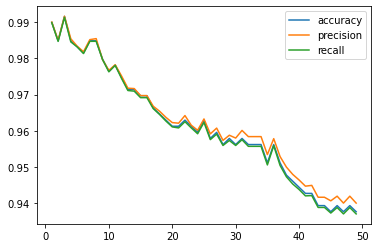

In [4]:
from sklearn import neighbors

# load the digit dataset
dataSet = datasets.load_digits()

data, target = shuffle(dataSet.data, dataSet.target, random_state=randomState)

# Prepare dataframe for results
knn_results_digits = pd.DataFrame(columns=resultColumns, index=testvalues)

# Prepare a train/test set split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=(randomState+1))

# parameters for k-NN
n_neighbors = testvalues

for n in n_neighbors:
    # train the k-NN
    classifier = neighbors.KNeighborsClassifier(n)
    classifier.random_state = randomState

    start_time_train = time.time()
    classifier.fit(X_train, y_train)
    end_time_train = time.time()

    # predict the test set on our trained classifier
    start_time_test = time.time()
    y_test_predicted = classifier.predict(X_test)
    end_time_test = time.time()

    # Compute metrics
    acc=metrics.accuracy_score(y_test, y_test_predicted)
    precision=metrics.precision_score(y_test, y_test_predicted, average=averagingApproach, zero_division=zero_divisionApproach)
    recall=metrics.recall_score(y_test, y_test_predicted, average=averagingApproach, zero_division=zero_divisionApproach)

    # Report results of five fold validation metrics
    scores = cross_val_score(classifier, data, target, cv=5)
    print("N: " + str(n))
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

    knn_results_digits.loc[n] = pd.Series({
        'accuracy':acc,
        'precision':precision,
        'recall':recall,
        'time training':end_time_train-start_time_train,
        'time testing':end_time_test-start_time_test
    })

print("Holdout Results for Digits Dataset and k-NN by Iterating over N values:")
display(knn_results_digits)
knn_results_digits[['accuracy','precision', 'recall']].plot.line()

#Store result with best accuracy in overall results dataframe
best_result = knn_results_digits[knn_results_digits['accuracy']==knn_results_digits['accuracy'].max()]
overall_results_digits.loc['k-NN']=best_result.loc[best_result.last_valid_index()]

#### Results
The results indicate good fits for models across n parameters, with decreasing results for higher n numbers.

## Naive Bayes

### Iris

In [5]:
from sklearn import naive_bayes

# load the Iris dataset
dataSet = datasets.load_iris()

data, target = shuffle(dataSet.data, dataSet.target, random_state=randomState)

# Prepare dataframe for results
bayes_results_iris = pd.DataFrame(columns=resultColumns, index=[1])

# Prepare a train/test set split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=(randomState+1))

classifier = naive_bayes.GaussianNB()
classifier.random_state=randomState

start_time_train = time.time()
classifier.fit(X_train, y_train)
end_time_train = time.time()

# predict the test set on our trained classifier
start_time_test = time.time()
y_test_predicted = classifier.predict(X_test)
end_time_test = time.time()

# Compute metrics
acc=metrics.accuracy_score(y_test, y_test_predicted)
precision=metrics.precision_score(y_test, y_test_predicted, average=averagingApproach, zero_division=zero_divisionApproach)
recall=metrics.recall_score(y_test, y_test_predicted, average=averagingApproach, zero_division=zero_divisionApproach)

# Report results of five fold validation metrics
scores = cross_val_score(classifier, data, target, cv=5)
print("5 Fold verification for Iris and Bayes")
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

bayes_results_iris.loc[1] = pd.Series({
    'accuracy':acc,
    'precision':precision,
    'recall':recall,
    'time training':end_time_train-start_time_train,
    'time testing':end_time_test-start_time_test
})

print("Holdout Results for Iris Dataset and Bayes:")
display(bayes_results_iris)

#Store result with best accuracy in overall results dataframe
overall_results_iris.loc['bayes']=bayes_results_iris.loc[1]

5 Fold verification for Iris and Bayes
Accuracy: 0.95 (+/- 0.07)
Holdout Results for Iris Dataset and Bayes:


,accuracy,precision,recall,time training,time testing
1,0.9,0.90305,0.912698,0.00099802,0


#### Results
Analysis using Bayes on the Iris dataset show good values for accuracy, precision and recall with extremely low training and testing time.

### Digits


In [6]:
from sklearn import naive_bayes

# load the digit dataset
dataSet = datasets.load_digits()

data, target = shuffle(dataSet.data, dataSet.target, random_state=randomState)

# Prepare dataframe for results
bayes_results_digits = pd.DataFrame(columns=resultColumns, index=[1])

# Prepare a train/test set split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=(randomState+1))

classifier = naive_bayes.GaussianNB()
classifier.random_state=randomState

start_time_train = time.time()
classifier.fit(X_train, y_train)
end_time_train = time.time()

# predict the test set on our trained classifier
start_time_test = time.time()
y_test_predicted = classifier.predict(X_test)
end_time_test = time.time()

# Compute metrics
acc=metrics.accuracy_score(y_test, y_test_predicted)
precision=metrics.precision_score(y_test, y_test_predicted, average=averagingApproach, zero_division=zero_divisionApproach)
recall=metrics.recall_score(y_test, y_test_predicted, average=averagingApproach, zero_division=zero_divisionApproach)

# Report results of five fold validation metrics
scores = cross_val_score(classifier, data, target, cv=5)
print("5 Fold verification for Digits and Bayes")
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

bayes_results_digits.loc[1] = pd.Series({
    'accuracy':acc,
    'precision':precision,
    'recall':recall,
    'time training':end_time_train-start_time_train,
    'time testing':end_time_test-start_time_test
})

print("Holdout Results for Digits Dataset and Bayes:")
display(bayes_results_digits)

#Store result with best accuracy in overall results dataframe
overall_results_digits.loc['bayes']=bayes_results_digits.loc[1]


5 Fold verification for Digits and Bayes
Accuracy: 0.83 (+/- 0.02)
Holdout Results for Digits Dataset and Bayes:


,accuracy,precision,recall,time training,time testing
1,0.833333,0.850641,0.833908,0.00199437,0.00299287


#### Results for Bayes on the Digit Dataset
Analysis using Bayes on the Digit Dataset show still good values for accuracy, precision and recall with extremely low training and testing time.

However, compared to k NN, the results for this data set are significantly lower for Bayes. While this was similar for the Iris dataset, with lower accuracy for bayes than for the k-nn, the difference was not similarly strong.

## Perceptron

### Iris

In [7]:
from sklearn import linear_model

# load the Iris dataset
dataSet = datasets.load_iris()

data, target = shuffle(dataSet.data, dataSet.target, random_state=randomState)

# Prepare dataframe for results
perceptron_results_iris = pd.DataFrame(columns=resultColumns, index=[1])

# Prepare a train/test set split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=(randomState+1))

classifier = linear_model.Perceptron()
classifier.random_state = randomState
start_time_train = time.time()
classifier.fit(X_train, y_train)
end_time_train = time.time()

# predict the test set on our trained classifier
start_time_test = time.time()
y_test_predicted = classifier.predict(X_test)
end_time_test = time.time()

# Compute metrics
acc=metrics.accuracy_score(y_test, y_test_predicted)
precision=metrics.precision_score(y_test, y_test_predicted, average=averagingApproach, zero_division=zero_divisionApproach)
recall=metrics.recall_score(y_test, y_test_predicted, average=averagingApproach, zero_division=zero_divisionApproach)

# Report results of five fold validation metrics
scores = cross_val_score(classifier, data, target, cv=5)
print("5 Fold verification for the Perceptron and the Iris Dataset")
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

perceptron_results_iris.loc[1] = pd.Series({
    'accuracy':acc,
    'precision':precision,
    'recall':recall,
    'time training':end_time_train-start_time_train,
    'time testing':end_time_test-start_time_test
})

print("Holdout Results for Iris Dataset and Perceptron:")
display(perceptron_results_iris)

#Store result with best accuracy in overall results dataframe
overall_results_iris.loc['perceptron']=perceptron_results_iris.loc[1]

5 Fold verification for the Perceptron and the Iris Dataset
Accuracy: 0.74 (+/- 0.21)
Holdout Results for Iris Dataset and Perceptron:


,accuracy,precision,recall,time training,time testing
1,0.34,0.432624,0.4,0.00299144,0


#### Results for Perceptron on the Iris Dataset
Analysis using the Perceptron approach on the Iris Dataset show low values for accuracy, precision and recall with extremely low training and testing time.

Compared to both Bayes and k NN, the results for this data set are significantly lower.

### Digits

In [8]:
from sklearn import linear_model

# load the digit dataset
dataSet = datasets.load_digits()

data, target = shuffle(dataSet.data, dataSet.target, random_state=randomState)

# Prepare dataframe for results
perceptron_results_digits = pd.DataFrame(columns=resultColumns, index=[1])

# Prepare a train/test set split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=(randomState+1))

classifier = linear_model.Perceptron()
classifier.random_state = randomState

start_time_train = time.time()
classifier.fit(X_train, y_train)
end_time_train = time.time()

# predict the test set on our trained classifier
start_time_test = time.time()
y_test_predicted = classifier.predict(X_test)
end_time_test = time.time()

# Compute metrics
acc=metrics.accuracy_score(y_test, y_test_predicted)
precision=metrics.precision_score(y_test, y_test_predicted, average=averagingApproach, zero_division=zero_divisionApproach)
recall=metrics.recall_score(y_test, y_test_predicted, average=averagingApproach, zero_division=zero_divisionApproach)

# Report results of five fold validation metrics
scores = cross_val_score(classifier, data, target, cv=5)
print("5 Fold verification for the Perceptron and the Digits Dataset")
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

perceptron_results_digits.loc[1] = pd.Series({
    'accuracy':acc,
    'precision':precision,
    'recall':recall,
    'time training':end_time_train-start_time_train,
    'time testing':end_time_test-start_time_test
})

print("Holdout Results for Digits Dataset and Perceptron:")
display(perceptron_results_digits)

#Store result with best accuracy in overall results dataframe
overall_results_digits.loc['perceptron']=perceptron_results_digits.loc[1]

5 Fold verification for the Perceptron and the Digits Dataset
Accuracy: 0.94 (+/- 0.03)
Holdout Results for Digits Dataset and Perceptron:


,accuracy,precision,recall,time training,time testing
1,0.939394,0.94141,0.93962,0.0229361,0.000970125


#### Results for Perceptron on the Digits Dataset
Analysis using the Perceptron approach on the Digits Dataset show very good values for accuracy, precision and recall with extremely low training and testing time.

Both Bayes and kNN yielded comparable results. The difference between the Digit and Iris dataset show Perceptron's high susceptibility to the data it is used for.

## Decision Tree

### Iris

5 Fold Results for Splitting Approach: random and  max_depth: 1
Accuracy: 0.56 (+/- 0.05)
5 Fold Results for Splitting Approach: random and  max_depth: 2
Accuracy: 0.59 (+/- 0.05)
5 Fold Results for Splitting Approach: random and  max_depth: 3
Accuracy: 0.64 (+/- 0.11)
5 Fold Results for Splitting Approach: random and  max_depth: 4
Accuracy: 0.83 (+/- 0.11)
5 Fold Results for Splitting Approach: random and  max_depth: 5
Accuracy: 0.88 (+/- 0.11)
5 Fold Results for Splitting Approach: random and  max_depth: 6
Accuracy: 0.91 (+/- 0.08)
5 Fold Results for Splitting Approach: random and  max_depth: 7
Accuracy: 0.93 (+/- 0.08)
5 Fold Results for Splitting Approach: random and  max_depth: 8
Accuracy: 0.91 (+/- 0.05)
5 Fold Results for Splitting Approach: random and  max_depth: 9
Accuracy: 0.92 (+/- 0.03)
5 Fold Results for Splitting Approach: best and  max_depth: 1
Accuracy: 0.67 (+/- 0.00)
5 Fold Results for Splitting Approach: best and  max_depth: 2
Accuracy: 0.93 (+/- 0.09)
5 Fold Results

'Holdout Results for Iris Dataset and Decision Tree when Iterating over Max Tree Depth with splitter random'

,accuracy,precision,recall,time training,time testing
1,0.48,0.45,0.555556,0.000997305,0
2,0.5,0.786325,0.571429,0,0
3,0.5,0.686782,0.563492,0.000999451,0
4,0.74,0.819167,0.785714,0,0
5,0.88,0.890278,0.865079,0,0
6,0.9,0.894956,0.904762,0,0
7,0.88,0.877315,0.888889,0.000997066,0
8,0.88,0.877315,0.888889,0.000997066,0
9,0.88,0.877315,0.888889,0.000997543,0


'Holdout Results for Iris Dataset and Decision Tree when Iterating over Max Tree Depth with splitter best'

,accuracy,precision,recall,time training,time testing
1,0.58,0.466667,0.666667,0.00098896,0
2,0.9,0.90305,0.912698,0.00099659,0
3,0.92,0.919956,0.928571,0.000985861,0
4,0.92,0.919956,0.928571,0.00100255,0
5,0.92,0.919956,0.928571,0.000997543,0
6,0.92,0.919956,0.928571,0.00099802,0
7,0.92,0.919956,0.928571,0.0010035,0
8,0.92,0.919956,0.928571,0.000997066,0
9,0.92,0.919956,0.928571,0,0.000997305


[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

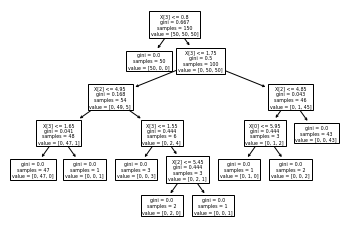

In [9]:
from sklearn import tree

# load the Iris dataset
dataSet = datasets.load_iris()

# max depth values
max_depth_values = range(1,10)

# Splitting approach
splitting_approaches = ['random', 'best']

data, target = shuffle(dataSet.data, dataSet.target, random_state=randomState)

# Prepare dataframe for results
decision_tree_results_iris = pd.DataFrame(columns=resultColumns, index=max_depth_values)

# Prepare a train/test set split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=(randomState+1))

for splitting_approach in splitting_approaches:
    for max_depth in max_depth_values:
        classifier = tree.DecisionTreeClassifier(criterion='gini', max_depth=max_depth, splitter=splitting_approach)
        classifier.random_state = randomState

        start_time_train = time.time()
        classifier.fit(X_train, y_train)
        end_time_train = time.time()

        # predict the test set on our trained classifier
        start_time_test = time.time()
        y_test_predicted = classifier.predict(X_test)
        end_time_test = time.time()

        # Compute metrics
        acc=metrics.accuracy_score(y_test, y_test_predicted)
        precision=metrics.precision_score(y_test, y_test_predicted, average=averagingApproach, zero_division=zero_divisionApproach)
        recall=metrics.recall_score(y_test, y_test_predicted, average=averagingApproach, zero_division=zero_divisionApproach)

        # Report results of five fold validation metrics
        scores = cross_val_score(classifier, data, target, cv=5)
        print("5 Fold Results for Splitting Approach: " + splitting_approach + " and  max_depth: " + str(max_depth))
        print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

        decision_tree_results_iris.loc[max_depth] = pd.Series({
            'accuracy':acc,
            'precision':precision,
            'recall':recall,
            'time training':end_time_train-start_time_train,
            'time testing':end_time_test-start_time_test
        })

    display("Holdout Results for Iris Dataset and Decision Tree when Iterating over Max Tree Depth with splitter " + splitting_approach,
            decision_tree_results_iris)

#Store result with best accuracy in overall results dataframe
best_result = decision_tree_results_iris[decision_tree_results_iris['accuracy']==decision_tree_results_iris['accuracy'].max()]
overall_results_iris.loc['decision tree']=best_result.loc[best_result.last_valid_index()]

decision_tree_results_iris[['accuracy','precision','recall']].plot.line()
tree.plot_tree(classifier.fit(dataSet.data, dataSet.target),max_depth=5)

#### Random and Best Splitting Approach for the Decision Tree on the Iris Dataset
The overall results indicate that the "best" splitting parameter yields by far superior results compared to the "random" approach.

Hence, for further analyses in this exercise this approach will be used.


#### Min Sample Leaf Values
Additional analyses of the results from the previous step show that there is overfitting after a max depth of 2 with only limited benefits of additional splits.
To counteract the creation of additional nodes, min_samples_leaf is added as parameter for an extensive high maximum depth (30).

5 Fold Results for Decision Tree and Iris with min_sample_leaf: 2
Accuracy: 0.94 (+/- 0.09)
5 Fold Results for Decision Tree and Iris with min_sample_leaf: 3
Accuracy: 0.93 (+/- 0.08)
5 Fold Results for Decision Tree and Iris with min_sample_leaf: 4
Accuracy: 0.93 (+/- 0.09)
5 Fold Results for Decision Tree and Iris with min_sample_leaf: 5
Accuracy: 0.93 (+/- 0.09)
5 Fold Results for Decision Tree and Iris with min_sample_leaf: 6
Accuracy: 0.93 (+/- 0.09)
5 Fold Results for Decision Tree and Iris with min_sample_leaf: 7
Accuracy: 0.93 (+/- 0.09)
5 Fold Results for Decision Tree and Iris with min_sample_leaf: 8
Accuracy: 0.93 (+/- 0.09)
5 Fold Results for Decision Tree and Iris with min_sample_leaf: 9
Accuracy: 0.93 (+/- 0.09)
5 Fold Results for Decision Tree and Iris with min_sample_leaf: 10
Accuracy: 0.93 (+/- 0.09)
5 Fold Results for Decision Tree and Iris with min_sample_leaf: 11
Accuracy: 0.93 (+/- 0.09)
5 Fold Results for Decision Tree and Iris with min_sample_leaf: 12
Accuracy: 0

,accuracy,precision,recall,time training,time testing
2,0.9,0.90305,0.912698,0,0.000966072
3,0.9,0.90305,0.912698,0.00198865,0
4,0.9,0.90305,0.912698,0,0
5,0.9,0.90305,0.912698,0.000996828,0
6,0.9,0.90305,0.912698,0.00098896,0
7,0.9,0.90305,0.912698,0.000997305,0
8,0.9,0.90305,0.912698,0.00100541,0
9,0.9,0.90305,0.912698,0.000998497,0
10,0.9,0.90305,0.912698,0.00100851,0
11,0.9,0.90305,0.912698,0.000997543,0


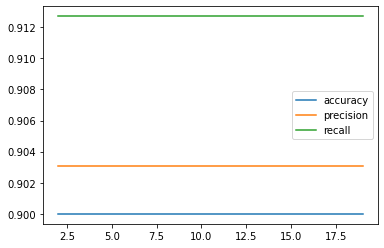

In [10]:
# min sample leaf values values
min_samples_leaf_values = range(2,20)
max_depth = 30

# Prepare dataframe for results
decision_tree_results_iris_min_leaf = pd.DataFrame(columns=resultColumns, index=min_samples_leaf_values)

for min_samples_leaf in min_samples_leaf_values:
    classifier = tree.DecisionTreeClassifier(criterion='gini', max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    classifier.random_state = randomState

    start_time_train = time.time()
    classifier.fit(X_train, y_train)
    end_time_train = time.time()

    # predict the test set on our trained classifier
    start_time_test = time.time()
    y_test_predicted = classifier.predict(X_test)
    end_time_test = time.time()

    # Compute metrics
    acc=metrics.accuracy_score(y_test, y_test_predicted)
    precision=metrics.precision_score(y_test, y_test_predicted, average=averagingApproach, zero_division=zero_divisionApproach)
    recall=metrics.recall_score(y_test, y_test_predicted, average=averagingApproach, zero_division=zero_divisionApproach)

    # Report results of five fold validation metrics
    scores = cross_val_score(classifier, data, target, cv=5)
    print("5 Fold Results for Decision Tree and Iris with min_sample_leaf: " + str(min_samples_leaf))
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

    decision_tree_results_iris_min_leaf.loc[min_samples_leaf] = pd.Series({
        'accuracy':acc,
        'precision':precision,
        'recall':recall,
        'time training':end_time_train-start_time_train,
        'time testing':end_time_test-start_time_test
    })

print("Holdout Results for Iris Dataset and Decision Tree when Iterating over Minimum Samples per Leaf Parameter:")

display(decision_tree_results_iris_min_leaf)
decision_tree_results_iris_min_leaf[['accuracy','precision','recall']].plot.line()

### Digits

5 Fold Results for Decision Tree and Digits and max_depth: 1
Accuracy: 0.20 (+/- 0.01)
5 Fold Results for Decision Tree and Digits and max_depth: 2
Accuracy: 0.32 (+/- 0.01)
5 Fold Results for Decision Tree and Digits and max_depth: 3
Accuracy: 0.47 (+/- 0.03)
5 Fold Results for Decision Tree and Digits and max_depth: 4
Accuracy: 0.57 (+/- 0.04)
5 Fold Results for Decision Tree and Digits and max_depth: 5
Accuracy: 0.65 (+/- 0.06)
5 Fold Results for Decision Tree and Digits and max_depth: 6
Accuracy: 0.75 (+/- 0.05)
5 Fold Results for Decision Tree and Digits and max_depth: 7
Accuracy: 0.81 (+/- 0.02)
5 Fold Results for Decision Tree and Digits and max_depth: 8
Accuracy: 0.84 (+/- 0.03)
5 Fold Results for Decision Tree and Digits and max_depth: 9
Accuracy: 0.85 (+/- 0.03)
5 Fold Results for Decision Tree and Digits and max_depth: 10
Accuracy: 0.86 (+/- 0.02)
5 Fold Results for Decision Tree and Digits and max_depth: 11
Accuracy: 0.86 (+/- 0.03)
5 Fold Results for Decision Tree and Digi

,accuracy,precision,recall,time training,time testing
1,0.183502,0.0745474,0.198113,0.00199437,0
2,0.294613,0.209627,0.315991,0.00398874,0
3,0.462963,0.396473,0.471593,0.00498676,0.000997305
4,0.550505,0.576076,0.558133,0.00797868,0
5,0.664983,0.744789,0.665558,0.00897622,0
6,0.750842,0.775607,0.751557,0.00997305,0
7,0.801347,0.818605,0.803122,0.0109713,0.00099802
8,0.826599,0.842328,0.830043,0.0129344,0
9,0.838384,0.849072,0.841641,0.0139623,0
10,0.851852,0.861205,0.853708,0.0129685,0.000999689


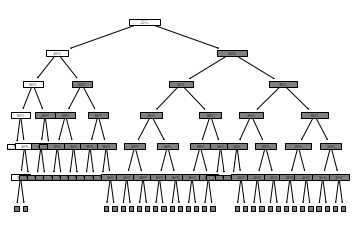

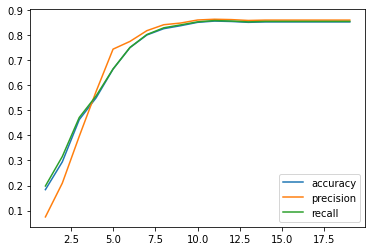

In [11]:
from sklearn import tree

# load the digit dataset
dataSet = datasets.load_digits()

# max depth values
max_depth_values = range(1,20)

data, target = shuffle(dataSet.data, dataSet.target, random_state=randomState)

# Prepare dataframe for results
decision_tree_results_digits = pd.DataFrame(columns=resultColumns, index=max_depth_values)

# Prepare a train/test set split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=(randomState+1))

for max_depth in max_depth_values:
    classifier = tree.DecisionTreeClassifier(criterion='gini', max_depth=max_depth)
    classifier.random_state = randomState

    start_time_train = time.time()
    classifier.fit(X_train, y_train)
    end_time_train = time.time()

    # predict the test set on our trained classifier
    start_time_test = time.time()
    y_test_predicted = classifier.predict(X_test)
    end_time_test = time.time()

    # Compute metrics
    acc=metrics.accuracy_score(y_test, y_test_predicted)
    precision=metrics.precision_score(y_test, y_test_predicted, average=averagingApproach, zero_division=zero_divisionApproach)
    recall=metrics.recall_score(y_test, y_test_predicted, average=averagingApproach, zero_division=zero_divisionApproach)

    # Report results of five fold validation metrics
    scores = cross_val_score(classifier, data, target, cv=5)
    print("5 Fold Results for Decision Tree and Digits and max_depth: " + str(max_depth))
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

    tree.plot_tree(classifier.fit(dataSet.data, dataSet.target),max_depth=5)

    decision_tree_results_digits.loc[max_depth] = pd.Series({
        'accuracy':acc,
        'precision':precision,
        'recall':recall,
        'time training':end_time_train-start_time_train,
        'time testing':end_time_test-start_time_test
    })

print("Results for Digits Dataset and Decision Tree:")
display(decision_tree_results_digits)
decision_tree_results_digits[['accuracy','precision','recall']].plot.line()

#Store result with best accuracy in overall results dataframe
best_result = decision_tree_results_digits[decision_tree_results_digits['accuracy']==decision_tree_results_digits['accuracy'].max()]
overall_results_digits.loc['decision tree']=best_result.loc[best_result.last_valid_index()]

#### Results for Decision Tree on the Digits Dataset
Analysis using the Decision Tree approach on the Digits Dataset show a high relevance of the defined max tree depth for accuracy, precision and recall with extremely low training and testing time.

For a max depth of 7, the resulting tree yields good results with limited overfitting. Potential subsequent pruning could further reduce overfitting.

# Overall Results
## Iris Dataset

In [12]:
display(overall_results_iris)

,accuracy,precision,recall,time training,time testing
k-NN,0.98,0.977778,0.984127,0.000997543,0.00199366
bayes,0.9,0.90305,0.912698,0.00099802,0
perceptron,0.34,0.432624,0.4,0.00299144,0
decision tree,0.92,0.919956,0.928571,0,0.000997305


### Effectiveness
Despite the heterogenous approaches used, acccuracy, precision and recall were good across most approaches with the notable exception of the Perceptron.

The data set may hence be prone to ceiling effects for measuring effectiveness for such numerical categorization tasks.

### Efficiency
In the datasets used as well as in the approaches applied, the training and testing time measured were low to non-measurable.

Benchmarking with these limited differences across approaches would be too prone to additional confounding variables such as running background tasks and other effects not associated with the machine learning tasks.


## Handwritten Numbers/Digit Dataset

In [13]:
display(overall_results_digits)

,accuracy,precision,recall,time training,time testing
k-NN,0.991582,0.99161,0.991301,0.0169542,0.0917544
bayes,0.833333,0.850641,0.833908,0.00199437,0.00299287
perceptron,0.939394,0.94141,0.93962,0.0229361,0.000970125
decision tree,0.856902,0.864214,0.858971,0.0149601,0


### Effectiveness
Again,  acccuracy, precision and recall were good across all approaches.
In this specific case, also the perceptron yielded notable better results.

Again, the data set may  be prone to ceiling effects for measuring effectiveness for such image recognition tasks.

### Efficiency
Similar to the Iris dataset the training and testing time measured were low to non-measurable.

Benchmarking with these limited differences across approaches would be too prone to additional confounding variables such as running background tasks and other effects not associated with the machine learning tasks.
Larger and more complex datasets would yield more meaningful results in terms of efficiency.

## Splitting Techniques
As described earlier (see kNN for the Iris Dataset), cross validation of results in Scikit proved to be easily applicable and a valuable additional information for the interpretation of the results yielded.
